In [3]:
import numpy as np
import imageio
import os
from os import listdir
from PIL import Image
import matplotlib.pyplot as plt
import re
%matplotlib inline

path = 'yaleBfaces/subset0/'
T = np.zeros((2500, 0))
train_labels = list()
for j, file in enumerate(os.listdir(path)):
    img = imageio.imread(os.path.join(path, file))
    img = img.reshape(-1, 1)
    T = np.hstack((T, img))
    print(os.path.split(file)[1])
    name = os.path.split(file)[1]
    regex = re.compile(r'\d+')
    num = int(regex.findall(name)[0])
    train_labels.append(num)
print(train_labels)   
train_labels = np.array([int(label) for label in train_labels])
# indices = np.arange(T.shape[1])
# np.random.shuffle(indices)
# T = T.T[indices].T
# train_labels = train_labels[indices]
print(train_labels)

person03_03.png
person01_06.png
person01_07.png
person03_02.png
person01_05.png
person01_04.png
person03_01.png
person03_05.png


ValueError: Could not find a format to read the specified file in single-image mode

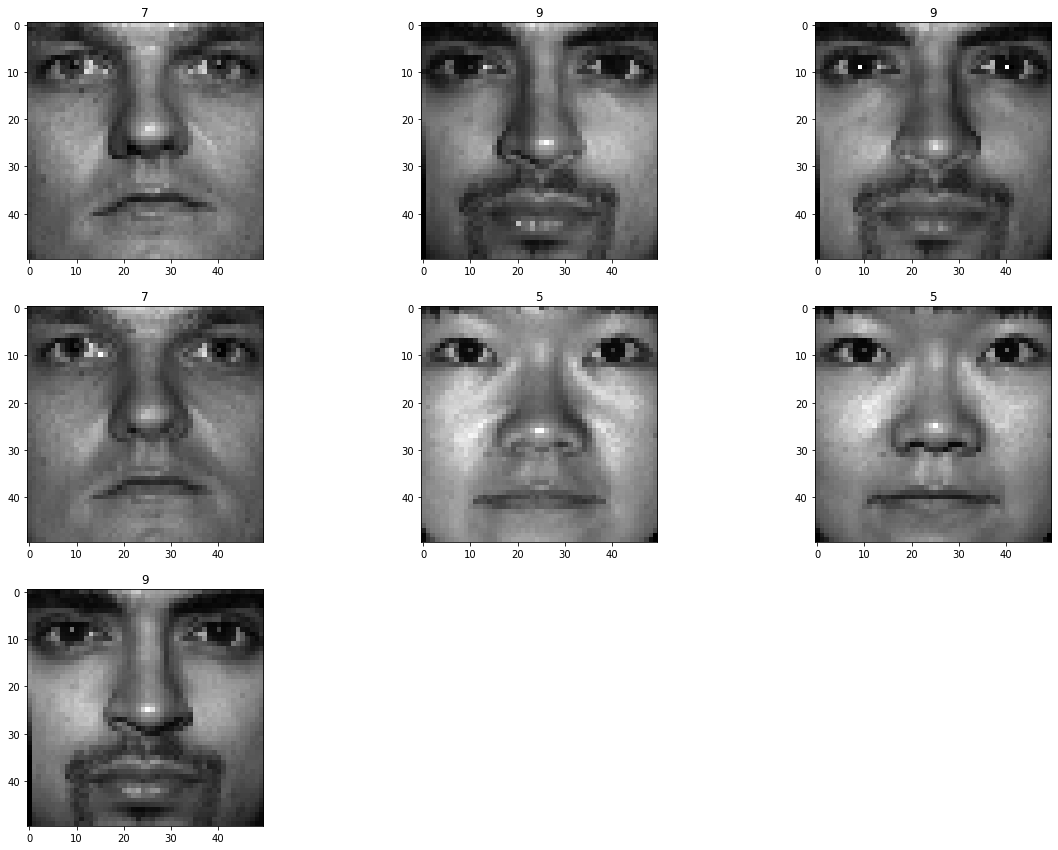

In [63]:
idx = np.random.randint(10)
def visualize(T, train_labels):
    plt.figure(figsize=(20, 20))
    for i in range(7):
        plt.subplot(4,3,i+1)
        plt.imshow(T[:,i+7*idx].reshape(50, 50), cmap='gray')
        plt.title(str(train_labels[i+7*idx]))
    plt.show()
    
visualize(T, train_labels)

In [22]:
def get_twenty_singular_vec(T):
    U, S, V = np.linalg.svd(T, full_matrices=False)
    return U[:,:20]

first_twenty = get_twenty_singular_vec(T)

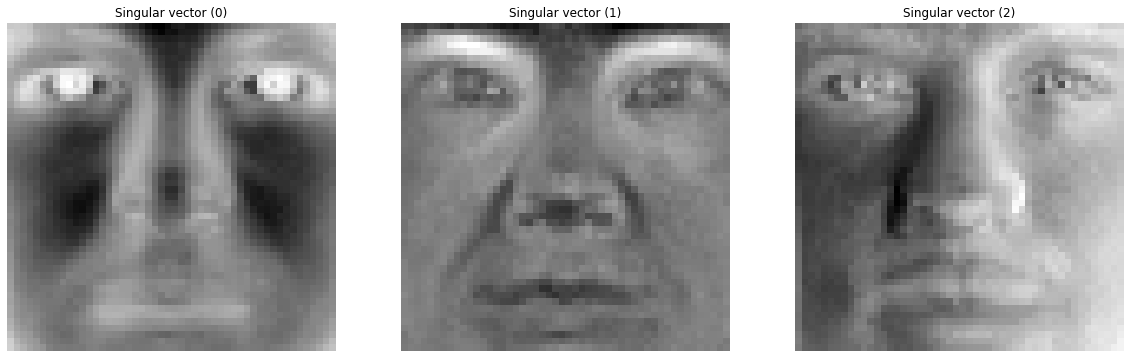

In [23]:
plt.figure(figsize=(20, 20))
plt.subplot(1,3,1)
plt.imshow(first_twenty[:,0].reshape(50, 50), cmap='gray')
plt.title('Singular vector (0)')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(first_twenty[:,1].reshape(50, 50), cmap='gray')
plt.title('Singular vector (1)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(first_twenty[:,2].reshape(50, 50), cmap='gray')
plt.title('Singular vector (2)')
plt.axis('off')

plt.show()

In [35]:
import re
path = '/Users/zyairexie/TUM/TUM SS2021/Information retrival hign deminsional data/assignment2/yaleBfaces'
test_samples = np.zeros((2500, 0))
test_labels = list()

for dir in os.listdir(path):
    if dir != 'subset0':
        for file in os.listdir(os.path.join(path, dir)):
            img = imageio.imread(os.path.join(path, dir, file))
            img = img.reshape(-1, 1)
            test_samples = np.hstack((test_samples, img))
            test_labels.append(''.join(char for char in file.split('_')[0] if char.isdigit()))
            
test_labels = np.array([int(label) for label in test_labels])
print(test_samples.shape)

(2500, 570)


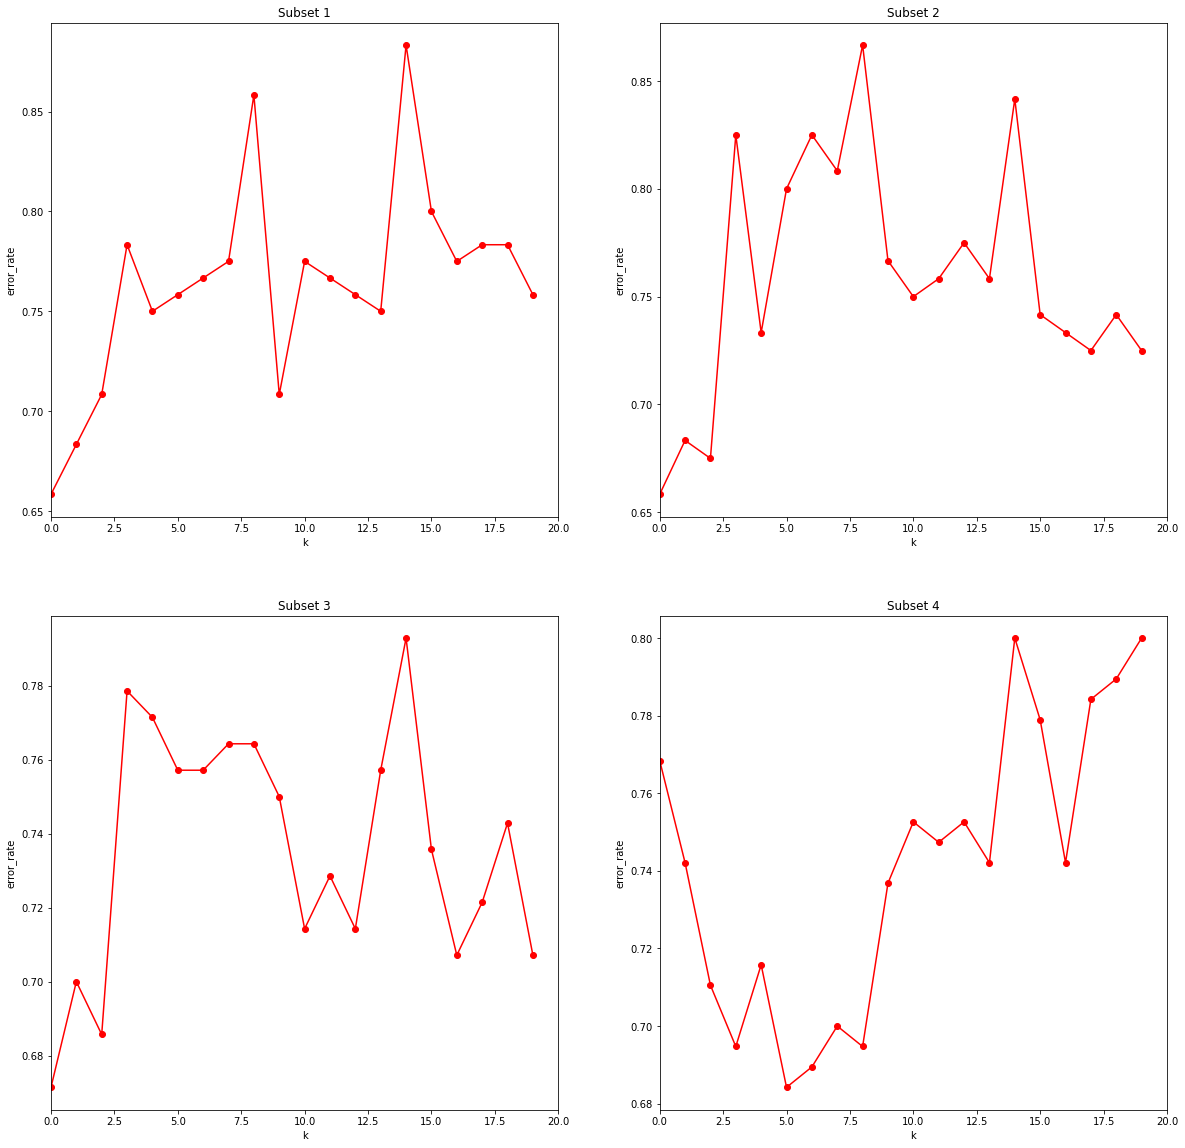

In [36]:
path = os.path.join(os.getcwd(), 'yaleBfaces/')
test_1 = test_samples[:,:120]
test_2 = test_samples[:,120:240]
test_3 = test_samples[:,240:380]
test_4 = test_samples[:,380:]
test_subsets = [test_1, test_2, test_3, test_4]

def pca_classify(T, train_labels, test_samples, test_labels, singular_vectors, k):
    W_train = np.dot(singular_vectors.T[:k+1], T)
#     print(T.shape)
#     print(singular_vectors[:,:k+1].shape)
#     W_train = T.T @ singular_vectors[:,:k+1]
#     print(W_train.shape)
    misclassified = 0
    for sample in range(test_samples.shape[1]):
        W_test = np.dot(singular_vectors.T[:k+1], test_samples[:,sample])
#         W_test = test_samples[:,sample] @ singular_vectors[:,:k+1]
        pred_image = np.zeros((2500,))
#         plt.figure(figsize=(8,8))
#         for i in range(k+1):
# #             print(np.dot(W_test[i], singular_vectors[:,i]).shape)
# #             pred_image += np.dot(W_test[i], singular_vectors[:,i])
#             plt.imshow(pred_image.reshape(50, 50), cmap='gray')
#             plt.show()
        errors = list()
        for i in range(T.shape[1]):
            errors.append(np.sqrt(np.sum(W_train[:,i] - W_test)**2))
    
        indices = np.argsort(errors)[:3]
        pred_labels = train_labels[indices]
        true_class = test_labels[sample]
        
        if not true_class in pred_labels:
            misclassified += 1
            
    return misclassified/test_samples.shape[1]
 
plt.figure(figsize=(20, 20))
for i in range(4): 
    error_rate = []
    for k in range(20):
        error_rate.append(pca_classify(T, train_labels, test_subsets[i], test_labels, first_twenty, k))
    plt.subplot(2,2,i+1)
    plt.plot(error_rate, 'ro-')
    plt.xlabel('k')
    plt.xlim([0,20])
    plt.ylabel('error_rate')
    plt.title('Subset '+str(i+1))
plt.show()

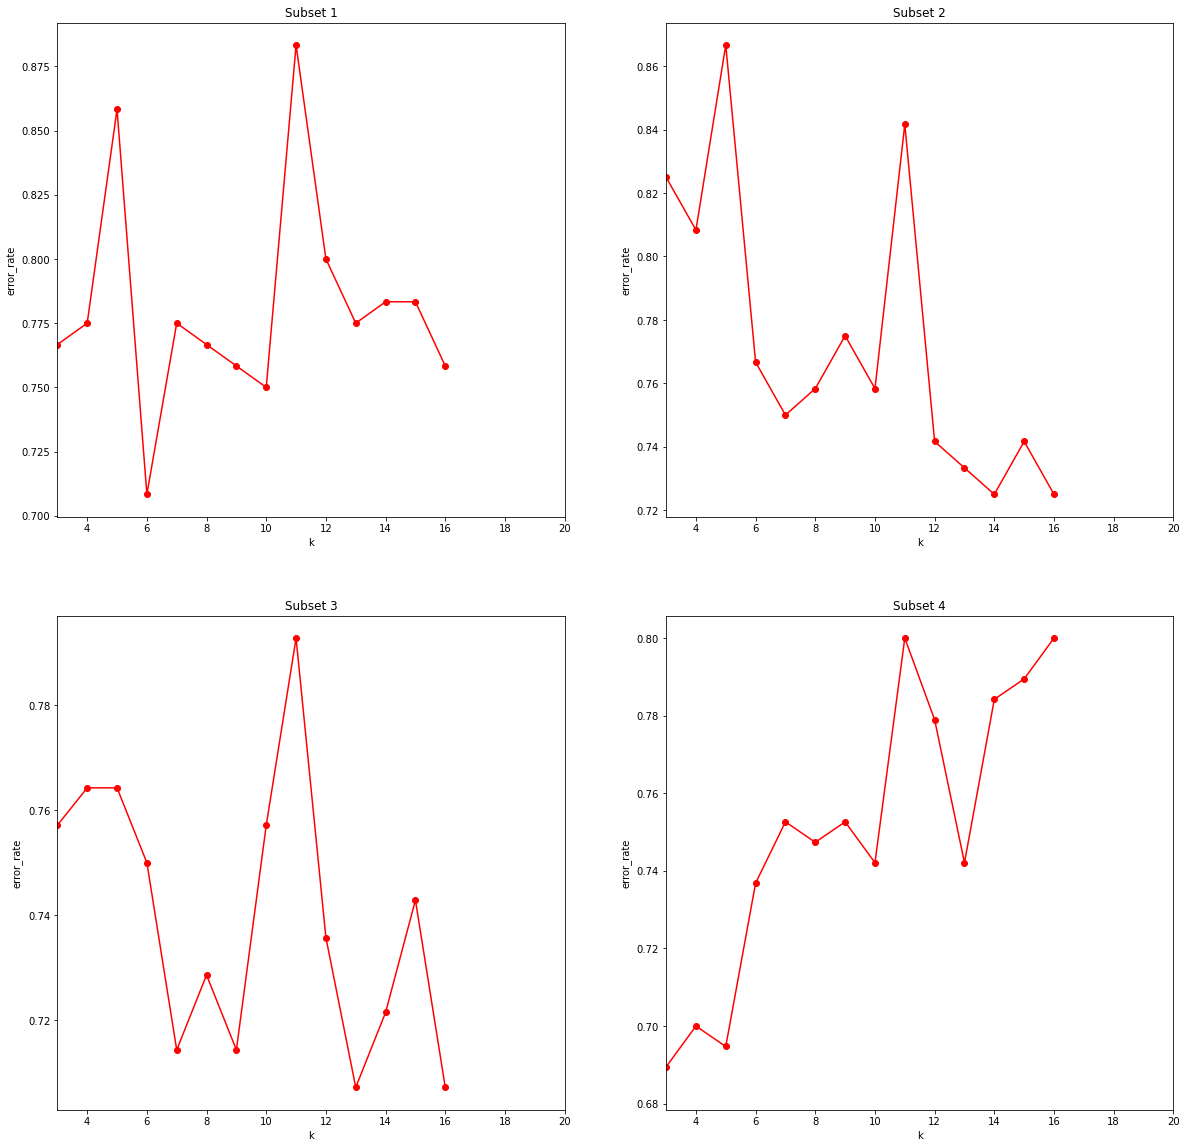

In [37]:
plt.figure(figsize=(20, 20))
for i in range(4): 
    error_rate = []
    for k in range(3,20):
        error_rate.append(pca_classify(T, train_labels, test_subsets[i], test_labels, first_twenty, k))
    plt.subplot(2,2,i+1)
    plt.plot(error_rate, 'ro-')
    plt.xlabel('k')
    plt.xlim([3,20])
    plt.ylabel('error_rate')
    plt.title('Subset '+str(i+1))
plt.show()
